In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Supervised-Learning/main/pima-indians-diabetes.csv")

In [3]:
df.shape

(768, 9)

In [4]:
df.dtypes

Preg       int64
Plas       int64
Pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Preg    768 non-null    int64  
 1   Plas    768 non-null    int64  
 2   Pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df["mass"]=df["mass"].replace(to_replace="0",value=np.nan)
df["mass"]=df["mass"].astype(float)
median=df["mass"].median()
df["mass"].replace(np.nan,median,inplace=True)

In [7]:
df["pedi"]=df["pedi"].replace(to_replace="0",value=np.nan)
df["pedi"]=df["pedi"].astype(float)
median=df["pedi"].median()
df["pedi"].replace(np.nan,median,inplace=True)

In [8]:
df["age"]=df["age"].replace(to_replace="0",value=np.nan)
df["age"]=df["age"].astype(float)
median=df["age"].median()
df["age"].replace(np.nan,median,inplace=True)

In [9]:
df["Preg"]=df["Preg"].replace(to_replace="0",value=np.nan)
df["Preg"]=df["Preg"].astype(float)

In [10]:
median=df["Preg"].median()

In [11]:
df["Preg"].replace(np.nan,median,inplace=True)

In [12]:
df["Plas"]=df["Plas"].replace(to_replace="0",value=np.nan)
df["Plas"]=df["Plas"].astype(float)
median=df["Plas"].median()
df["Plas"].replace(np.nan,median,inplace=True)

In [13]:
df["Pres"]=df["Pres"].replace(to_replace="0",value=np.nan)
df["Pres"]=df["Pres"].astype(float)
median=df["Pres"].median()
df["Pres"].replace(np.nan,median,inplace=True)

In [14]:
df["skin"]=df["skin"].replace(to_replace="0",value=np.nan)
df["skin"]=df["skin"].astype(float)
median=df["skin"].median()
df["skin"].replace(np.nan,median,inplace=True)

In [15]:
df["test"]=df["test"].replace(to_replace="0",value=np.nan)
df["test"]=df["test"].astype(float)
median=df["test"].median()
df["test"].replace(np.nan,median,inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Preg    768 non-null    float64
 1   Plas    768 non-null    float64
 2   Pres    768 non-null    float64
 3   skin    768 non-null    float64
 4   test    768 non-null    float64
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    float64
 8   class   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [17]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [18]:
lowage,uppage=remove_outlier(df['pedi'])
df["pedi"]=np.where(df['pedi']>uppage,uppage,df['pedi'])
df["pedi"]=np.where(df['pedi']<lowage,lowage,df['pedi'])

In [19]:
lowage,uppage=remove_outlier(df['age'])
df["age"]=np.where(df['age']>uppage,uppage,df['age'])
df["age"]=np.where(df['age']<lowage,lowage,df['age'])

In [20]:
lowage,uppage=remove_outlier(df['Preg'])
df["Preg"]=np.where(df['Preg']>uppage,uppage,df['Preg'])
df["Preg"]=np.where(df['Preg']<lowage,lowage,df['Preg'])

In [21]:
lowage,uppage=remove_outlier(df['Plas'])
df["Plas"]=np.where(df['Plas']>uppage,uppage,df['Plas'])
df["Plas"]=np.where(df['Plas']<lowage,lowage,df['Plas'])

In [22]:
lowage,uppage=remove_outlier(df['Pres'])
df["Pres"]=np.where(df['Pres']>uppage,uppage,df['Pres'])
df["Pres"]=np.where(df['Pres']<lowage,lowage,df['Pres'])

In [23]:
lowage,uppage=remove_outlier(df['skin'])
df["skin"]=np.where(df['skin']>uppage,uppage,df['skin'])
df["skin"]=np.where(df['skin']<lowage,lowage,df['skin'])

In [24]:
lowage,uppage=remove_outlier(df['test'])
df["test"]=np.where(df['test']>uppage,uppage,df['test'])
df["test"]=np.where(df['test']<lowage,lowage,df['test'])

In [25]:
lowage,uppage=remove_outlier(df['mass'])
df["mass"]=np.where(df['mass']>uppage,uppage,df['mass'])
df["mass"]=np.where(df['mass']<lowage,lowage,df['mass'])

C:\Users\rupes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mass'>

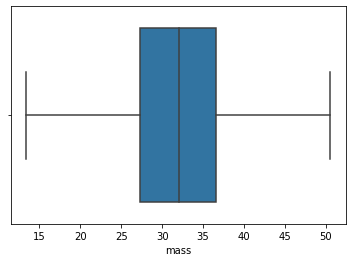

In [26]:
sns.boxplot(df["mass"])

In [27]:
df.describe(include="all")

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.837240,121.136230,70.684896,20.511719,73.652669,32.125065,0.458914,33.199870,0.348958
std,3.344157,31.187468,14.197239,15.844744,93.576029,7.049584,0.285596,11.628404,0.476951
min,0.000000,37.125000,35.000000,0.000000,0.000000,13.350000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,13.500000,199.000000,107.000000,80.000000,318.125000,50.550000,1.200000,66.500000,1.000000


In [28]:
df.corr()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
Preg,1.000000,0.128987,0.184307,-0.084349,-0.077793,0.024681,-0.017398,0.549695,0.220392
Plas,0.128987,1.000000,0.197865,0.059806,0.315856,0.235542,0.120213,0.269056,0.479158
Pres,0.184307,0.197865,1.000000,0.152644,0.050080,0.282544,0.038793,0.304208,0.113301
skin,-0.084349,0.059806,0.152644,1.000000,0.488101,0.401494,0.177920,-0.119170,0.073125
test,-0.077793,0.315856,0.050080,0.488101,1.000000,0.209665,0.190087,-0.065547,0.124721
mass,0.024681,0.235542,0.282544,0.401494,0.209665,1.000000,0.141087,0.043375,0.309739
pedi,-0.017398,0.120213,0.038793,0.177920,0.190087,0.141087,1.000000,0.047289,0.184969
age,0.549695,0.269056,0.304208,-0.119170,-0.065547,0.043375,0.047289,1.000000,0.242702
class,0.220392,0.479158,0.113301,0.073125,0.124721,0.309739,0.184969,0.242702,1.000000


In [29]:
x=df.drop(['class'],axis=1)
y=df[['class']]

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [31]:
reg=LogisticRegression()

In [32]:
reg.fit(x_train,y_train)

C:\Users\rupes\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\rupes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
predictions=reg.predict(x_test)

In [34]:
reg.score(x_train,y_train)

0.776536312849162

In [35]:
reg.score(x_test,y_test)

0.7922077922077922

In [36]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       146
           1       0.79      0.59      0.68        85

    accuracy                           0.79       231
   macro avg       0.79      0.75      0.76       231
weighted avg       0.79      0.79      0.78       231



In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.7922077922077922

In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[133,  13],
       [ 35,  50]], dtype=int64)

<AxesSubplot:>

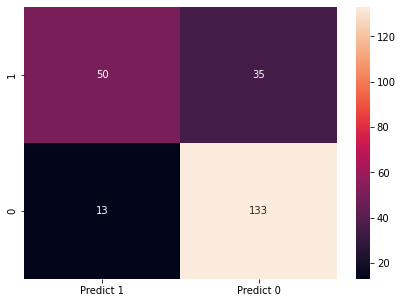

In [39]:
cm=metrics.confusion_matrix(y_test, predictions, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm,annot=True,fmt='g')
